# Computer Vision Lab 1
## Imports

In [125]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from skimage import img_as_float
from skimage.color import rgb2gray, rgb2hsv
from skimage.io import imread
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

## Section 3 - Reading and Displaying Images

In [68]:
# Step 3.1: Read in the images and masks
image_files = ["images/image-35.jpg", "images/image-83.jpg", "images/image-110.jpg"]
mask_files = ["images/mask-35.png", "images/mask-83.png", "images/mask-110.png"]

images = [cv2.imread(img) for img in image_files] 
masks = [cv2.imread(mask, cv2.IMREAD_GRAYSCALE) for mask in mask_files]

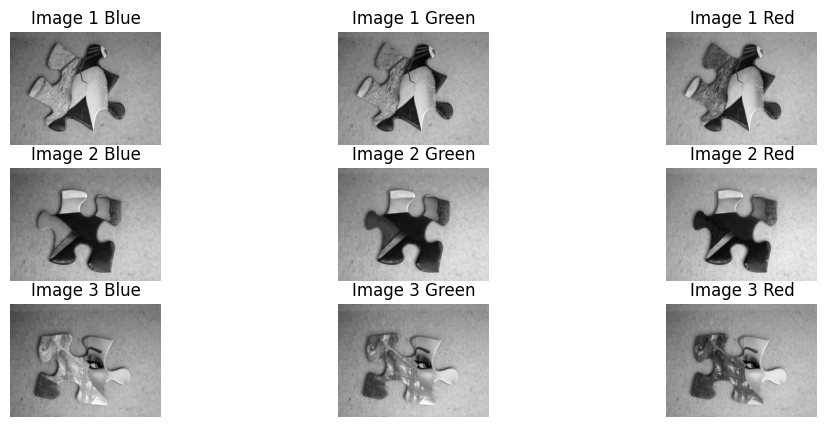

In [117]:
# Step 3.2: View the 3 components (channels) of the images separately
plt.figure(figsize=(12,5))

for i, img in enumerate(images):
    b, g, r = cv2.split(img)
    channels = [b, g, r]
    channel_names = ["Blue", "Green", "Red"]
    
    for j, (ch, name) in enumerate(zip(channels, channel_names)):
        plt.subplot(3, 3, i*3 + j + 1)
        plt.imshow(ch, cmap='gray')
        plt.title(f"Image {i+1} {name}")
        plt.axis('off')

plt.show()

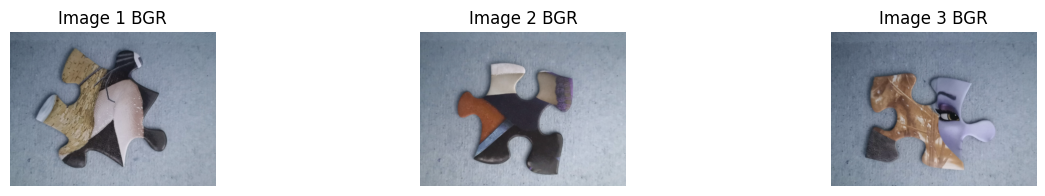

In [116]:
# Step 3.3: Display the colour images in BGR
plt.figure(figsize=(15,2))
for i, img in enumerate(images):
    plt.subplot(1,3,i+1)
    plt.imshow(img)  
    plt.title(f"Image {i+1} BGR")
    plt.axis('off')
plt.show()

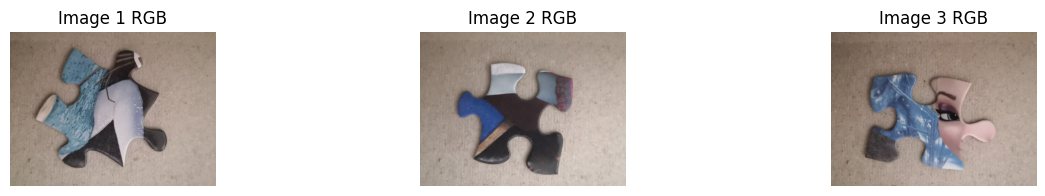

In [115]:
# Step 3.4: Swap channel order to RGB and display
images_rgb = [img[:,:,::-1] for img in images]
plt.figure(figsize=(15,2))
for i, img_rgb in enumerate(images_rgb):
    plt.subplot(1,3,i+1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1} RGB")
    plt.axis('off')
plt.show()

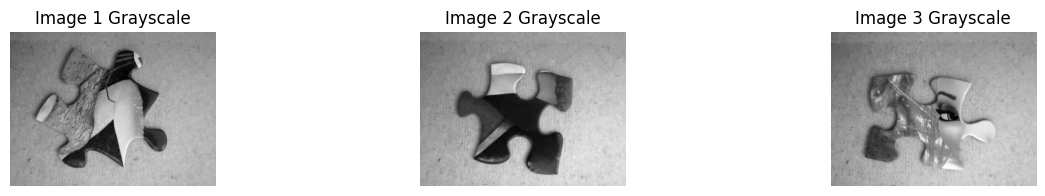

In [113]:
# Step 3.5: Convert images to grayscale and display
images_gray = [rgb2gray(img_rgb) for img_rgb in images_rgb]

plt.figure(figsize=(15,2))
for i, img_gray in enumerate(images_gray):
    plt.subplot(1,3,i+1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f"Image {i+1} Grayscale")
    plt.axis('off')
plt.show()

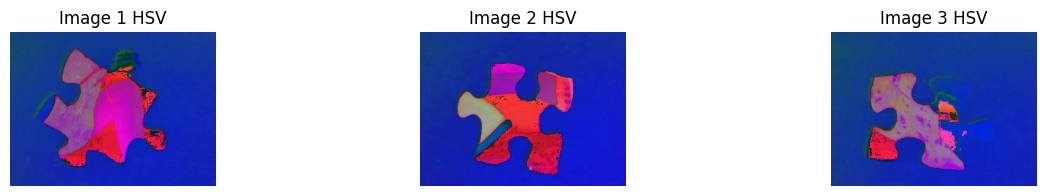

In [111]:
# Step 3.6: Convert images to HSV and display
images_hsv = [rgb2hsv(img_rgb) for img_rgb in images_rgb]

plt.figure(figsize=(15,2))
for i, img_hsv in enumerate(images_hsv):
    plt.subplot(1,3,i+1)
    plt.imshow(img_hsv)
    plt.title(f"Image {i+1} HSV")
    plt.axis('off')
plt.show()

## Section 4 - Descriptive Statistics

In [87]:
# Prepare image and mask
image35 = cv2.imread("images/image-35.jpg")
image35_rgb = image35[:,:,::-1]
image35_gray = rgb2gray(image35_rgb)
image35_hsv = rgb2hsv(image35_rgb)
image35_gray_uint8 = (image35_gray * 255).astype(np.uint8)

mask35 = cv2.imread("images/mask-35.png", cv2.IMREAD_GRAYSCALE)

In [75]:
# Step 4.1: Width and height
height, width = image35.shape[:2]
print(f"Width: {width}, Height: {height}")

Width: 600, Height: 450


In [76]:
# Step 4.2: Number of white pixels in mask
num_white_pixels = np.sum(mask35 == 255)
print(f"Number of white pixels in mask: {num_white_pixels}")

Number of white pixels in mask: 73196


In [77]:
# Step 4.3: Maximum pixel value in the image
max_gray = np.max(image35_gray_uint8)
print(f"Maximum pixel value in grayscale image: {max_gray}")

Maximum pixel value in grayscale image: 229


In [78]:
# Step 4.4: Maximum pixel value across puzzle pixels (mask == 255)
max_puzzle = np.max(image35_gray_uint8[mask35==255])
print(f"Maximum pixel value in puzzle pixels: {max_puzzle}")

Maximum pixel value in puzzle pixels: 229


In [79]:
# Step 4.5: Mean pixel intensity in grayscale image
mean_gray = np.mean(image35_gray_uint8)
print(f"Mean pixel intensity in image: {mean_gray:.2f}")

Mean pixel intensity in image: 136.86


In [80]:
# Step 4.6: Mean brightness of puzzle pixels
mean_puzzle = np.mean(image35_gray_uint8[mask35==255])
print(f"Mean brightness of puzzle pixels: {mean_puzzle:.2f}")

Mean brightness of puzzle pixels: 112.42


In [81]:
# Step 4.7: Mean brightness of background pixels
mean_background = np.mean(image35_gray_uint8[mask35==0])
print(f"Mean brightness of background pixels: {mean_background:.2f}")

Mean brightness of background pixels: 146.39


In [82]:
# Step 4.8: Variance in grayscale intensities for puzzle pixels
var_puzzle = np.var(image35_gray_uint8[mask35==255])
print(f"Variance for puzzle pixels: {var_puzzle:.2f}")


Variance for puzzle pixels: 2490.64


In [83]:
# Step 4.9: Variance in grayscale intensities for background pixels
var_background = np.var(image35_gray_uint8[mask35==0])
print(f"Variance for background pixels: {var_background:.2f}")

Variance for background pixels: 506.27


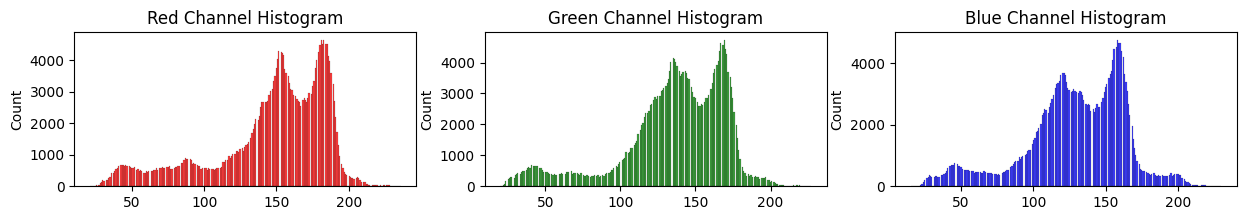

In [107]:
# Steps 4.10-4.12: Histograms of RGB channels
plt.figure(figsize=(15,2))
channels = ['Red','Green','Blue']
for i, color in enumerate(['r','g','b']):
    plt.subplot(1,3,i+1)
    sns.histplot(image35_rgb[:,:,i].flatten(), color=color, bins=256, kde=False)
    plt.title(f"{channels[i]} Channel Histogram")
plt.show()

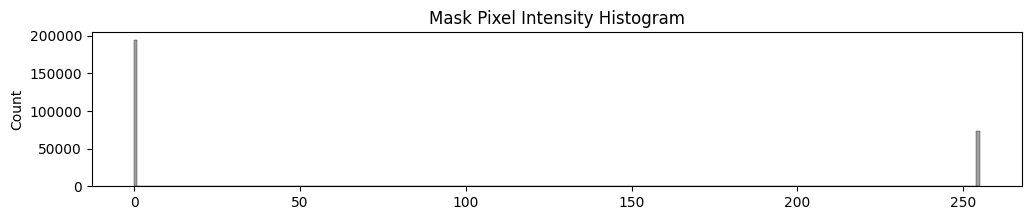

In [106]:
# Step 4.13: Histograms of the mask
plt.figure(figsize=(12,2))
sns.histplot(mask35.flatten(), bins=256, color='gray', kde=False)
plt.title("Mask Pixel Intensity Histogram")
plt.show()

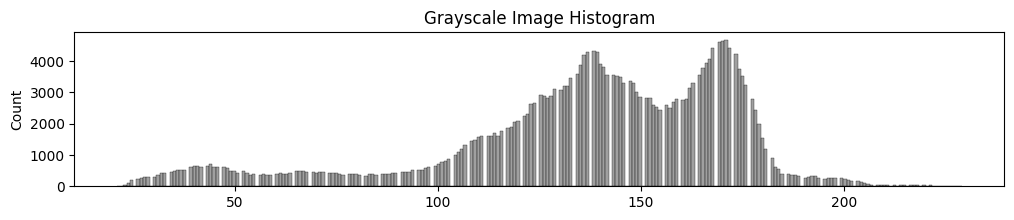

In [105]:
# Step 4.14: Histogram of grayscale image
plt.figure(figsize=(12,2))
sns.histplot(image35_gray_uint8.flatten(), bins=256, color='gray', kde=False)
plt.title("Grayscale Image Histogram")
plt.show()

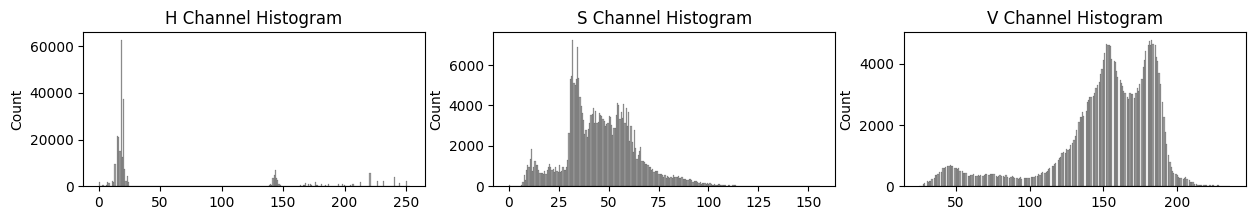

In [104]:
# Step 15: HSV channels histograms
plt.figure(figsize=(15,2))
hsv_channels = ['H','S','V']
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.histplot((image35_hsv[:,:,i]*255).flatten(), bins=256, color='gray', kde=False)
    plt.title(f"{hsv_channels[i]} Channel Histogram")
plt.show()

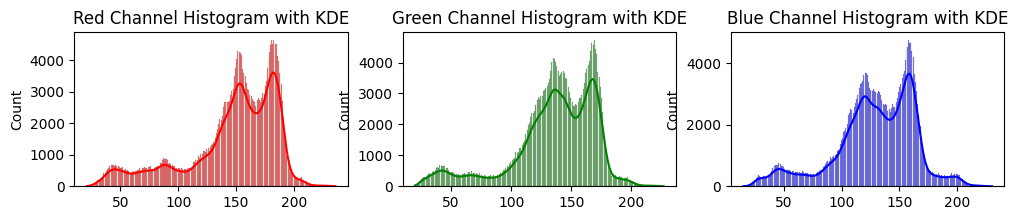

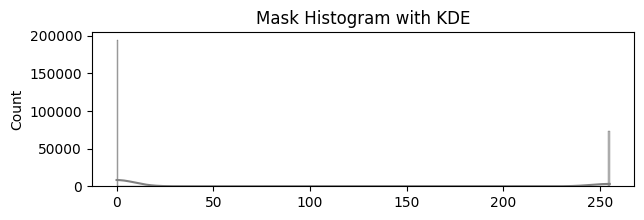

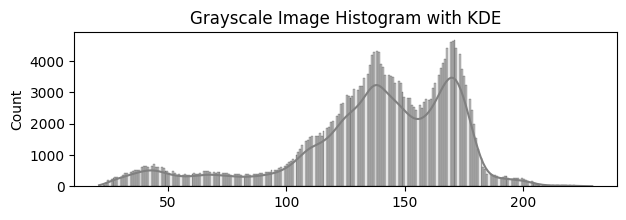

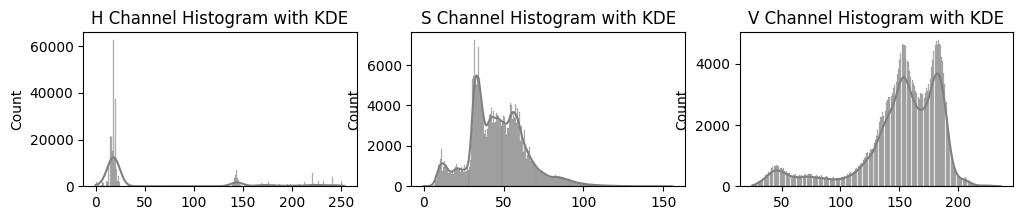

In [101]:
# Step 4.16: Repeat histograms with KDE
# RGB channels with KDE
plt.figure(figsize=(12,2))
channels = ['Red','Green','Blue']
for i, color in enumerate(['r','g','b']):
    plt.subplot(1,3,i+1)
    sns.histplot(image35_rgb[:,:,i].flatten(), color=color, bins=256, kde=True)
    plt.title(f"{channels[i]} Channel Histogram with KDE")
plt.show()

# Mask histogram with KDE
plt.figure(figsize=(7,2))
sns.histplot(mask35.flatten(), bins=256, color='gray', kde=True)
plt.title("Mask Histogram with KDE")
plt.show()

# Grayscale image histogram with KDE
plt.figure(figsize=(7,2))
sns.histplot(image35_gray_uint8.flatten(), bins=256, color='gray', kde=True)
plt.title("Grayscale Image Histogram with KDE")
plt.show()

# HSV channels histogram with KDE
plt.figure(figsize=(12,2))
hsv_channels = ['H','S','V']
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.histplot((image35_hsv[:,:,i]*255).flatten(), bins=256, color='gray', kde=True)
    plt.title(f"{hsv_channels[i]} Channel Histogram with KDE")
plt.show()

## Section 5 - Background Classifier

In [94]:
from skimage import img_as_float

# Step 5.1: Write convolution function with padding
def manual_convolve(image, kernel):
    # Convert to float32 in [0,1]
    if image.dtype != np.float32:
        image = img_as_float(image).astype(np.float32)

    # If RGB, process each channel separately
    if image.ndim == 3:  # Color image
        channels = [manual_convolve(image[:,:,c], kernel) for c in range(image.shape[2])]
        return np.stack(channels, axis=2)

    # Get dimensions
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad image with reflection
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    # Prepare output
    output = np.zeros_like(image, dtype=np.float32)

    # Flip kernel for convolution
    kernel_flipped = np.flipud(np.fliplr(kernel))

    # Convolution loop
    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel_flipped)

    return output


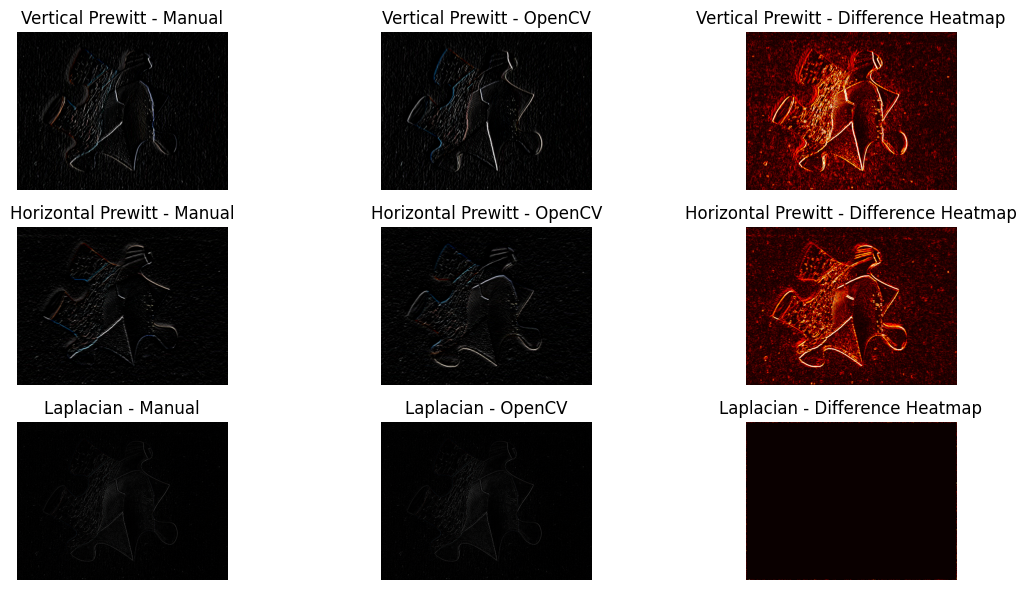

In [ ]:
# Step 5.2-5.3: Apply the Vertical Prewitt, Horizontal Prewitt, and Laplacian filters and compare with OpenCV convolution

# OpenCV convolution
def cv_convolve(image, kernel):
    if image.dtype != np.float32:
        image = img_as_float(image).astype(np.float32)
    return cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT)

# Kernels
prewitt_vertical = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]], dtype=np.float32)

prewitt_horizontal = np.array([[-1, -1, -1],
                                [0,  0,  0],
                                [1,  1,  1]], dtype=np.float32)

laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]], dtype=np.float32)

filters = [
    ("Vertical Prewitt", prewitt_vertical),
    ("Horizontal Prewitt", prewitt_horizontal),
    ("Laplacian", laplacian_kernel)
]

# ---------- Plot results ----------
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

for row, (name, kernel) in enumerate(filters):
    manual_res = manual_convolve(image35_rgb, kernel)
    cv_res = cv_convolve(image35_rgb, kernel)
    diff_map = np.abs(manual_res - cv_res)

    # Manual
    axes[row, 0].imshow(np.clip(manual_res, 0, 1))
    axes[row, 0].set_title(f"{name} - Manual")
    axes[row, 0].axis("off")

    # OpenCV
    axes[row, 1].imshow(np.clip(cv_res, 0, 1))
    axes[row, 1].set_title(f"{name} - OpenCV")
    axes[row, 1].axis("off")

    # Difference heatmap
    diff_show = np.mean(diff_map, axis=2) if diff_map.ndim == 3 else diff_map
    im = axes[row, 2].imshow(np.clip(diff_show, 0, 1), cmap="hot")
    axes[row, 2].set_title(f"{name} - Difference Heatmap")
    axes[row, 2].axis("off")

plt.tight_layout()
plt.show()


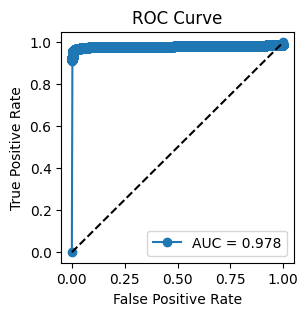

Metrics at threshold 0.5:
Accuracy: 0.980, Precision: 0.949, Recall: 0.964, F1: 0.956
Confusion Matrix:
[[205915   3148]
 [  2211  58726]]
AUC: 0.978


In [137]:
# Step 5.4-5.5: Classify with Bayes classifier and calculate metrics

# --- Load images ---
from skimage.io import imread
from skimage import img_as_float
from skimage.color import rgb2hsv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

train_image = img_as_float(imread("images/image-35.jpg")).astype(np.float32)
train_mask_raw = imread("images/mask-35.png")
# Convert mask to 2D if it's 3D (take first channel)
if len(train_mask_raw.shape) == 3:
    train_mask = train_mask_raw[:,:,0] > 0
else:
    train_mask = train_mask_raw > 0

val_image = img_as_float(imread("images/image-83.jpg")).astype(np.float32)
val_mask_raw = imread("images/mask-83.png")
# Convert mask to 2D if it's 3D (take first channel)
if len(val_mask_raw.shape) == 3:
    val_mask = val_mask_raw[:,:,0] > 0
else:
    val_mask = val_mask_raw > 0

# --- Define filters ---
prewitt_vertical = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=np.float32)
prewitt_horizontal = prewitt_vertical.T
laplacian_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=np.float32)

# --- Convolve training image ---
def manual_convolve(image, kernel):
    H, W, C = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w),(0,0)), mode='reflect')
    out = np.zeros_like(image)
    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded[i:i+kh, j:j+kw, c]
                out[i,j,c] = np.sum(region * kernel)
    return out

train_pv = manual_convolve(train_image, prewitt_vertical)
train_ph = manual_convolve(train_image, prewitt_horizontal)
train_lap = manual_convolve(train_image, laplacian_kernel)

# --- Construct 15-d feature vectors ---
def get_feature_vector(image_rgb, prewitt_v, prewitt_h, laplacian):
    hsv = rgb2hsv(image_rgb)
    H, W = image_rgb.shape[:2]
    
    # Flatten each feature map and stack horizontally to create (H*W, 15) matrix
    features = np.column_stack([
        prewitt_v.reshape(H*W, 3),
        prewitt_h.reshape(H*W, 3),
        laplacian.reshape(H*W, 3),
        image_rgb.reshape(H*W, 3),
        hsv.reshape(H*W, 3)
    ])
    return features

train_features = get_feature_vector(train_image, train_pv, train_ph, train_lap)

# --- Compute mean/covariance for foreground and background ---
fg_features = train_features[train_mask.flatten()]
bg_features = train_features[~train_mask.flatten()]

mu_fg = np.mean(fg_features, axis=0)
mu_bg = np.mean(bg_features, axis=0)

# Add regularization to handle numerical instability
reg_term = 1e-3 
cov_fg = np.cov(fg_features, rowvar=False) + reg_term*np.eye(15)
cov_bg = np.cov(bg_features, rowvar=False) + reg_term*np.eye(15)

N_fg = fg_features.shape[0]
N_bg = bg_features.shape[0]
N_total = N_fg + N_bg

# --- Prepare validation features ---
val_pv = manual_convolve(val_image, prewitt_vertical)
val_ph = manual_convolve(val_image, prewitt_horizontal)
val_lap = manual_convolve(val_image, laplacian_kernel)
val_features = get_feature_vector(val_image, val_pv, val_ph, val_lap)

# --- Apply Equation 3 ---
pdf_fg = multivariate_normal.pdf(val_features, mean=mu_fg, cov=cov_fg)
pdf_bg = multivariate_normal.pdf(val_features, mean=mu_bg, cov=cov_bg)

prob_fg = (pdf_fg * N_fg/N_total) / ((pdf_fg*N_fg/N_total) + (pdf_bg*N_bg/N_total))

prob_fg_image = prob_fg.reshape(val_image.shape[0], val_image.shape[1])

# --- Evaluate performance ---
val_mask_flat = val_mask.flatten()

# Function to compute metrics for a threshold
def compute_metrics(prob, mask, threshold):
    pred = prob >= threshold
    acc = accuracy_score(mask, pred)
    prec = precision_score(mask, pred)
    rec = recall_score(mask, pred)
    f1 = f1_score(mask, pred)
    cm = confusion_matrix(mask, pred)
    return acc, prec, rec, f1, cm

thresholds = np.linspace(0,1,10)
metrics = []

for t in thresholds:
    metrics.append(compute_metrics(prob_fg, val_mask_flat, t))

# --- Plot ROC curve ---
fpr, tpr, roc_thresh = roc_curve(val_mask_flat, prob_fg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, marker='o', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# --- Step 10: Print metrics at threshold 0.5 ---
acc, prec, rec, f1, cm = compute_metrics(prob_fg, val_mask_flat, 0.5)
print("Metrics at threshold 0.5:")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
print("Confusion Matrix:")
print(cm)
print(f"AUC: {roc_auc:.3f}")